In [23]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from glob import glob

from astropy.coordinates import Distance
from astropy import units as u

## On Axis

In [21]:
def Mag_dist(x):
    mu = 15.35
    sig = 1.59
    g = 1/(sig*np.sqrt(2*np.pi)) * np.exp(-1/2* ((x-mu)/sig)**2 )
    return g

def Lifetime(Lim, x):
    mag = Mag_dist(x)
    time = 10**((Lim-x)/2.5)
    return time
def M_0_lim(Lim,Time):
    return Lim - 2.5*np.log10(Time)

In [7]:
x = np.arange(10,22,0.1)
y = Mag_dist(x)

<IPython.core.display.Javascript object>


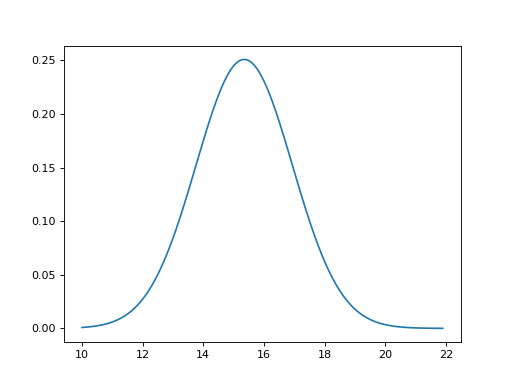

In [8]:
plt.figure()
plt.plot(x,y)

<IPython.core.display.Javascript object>


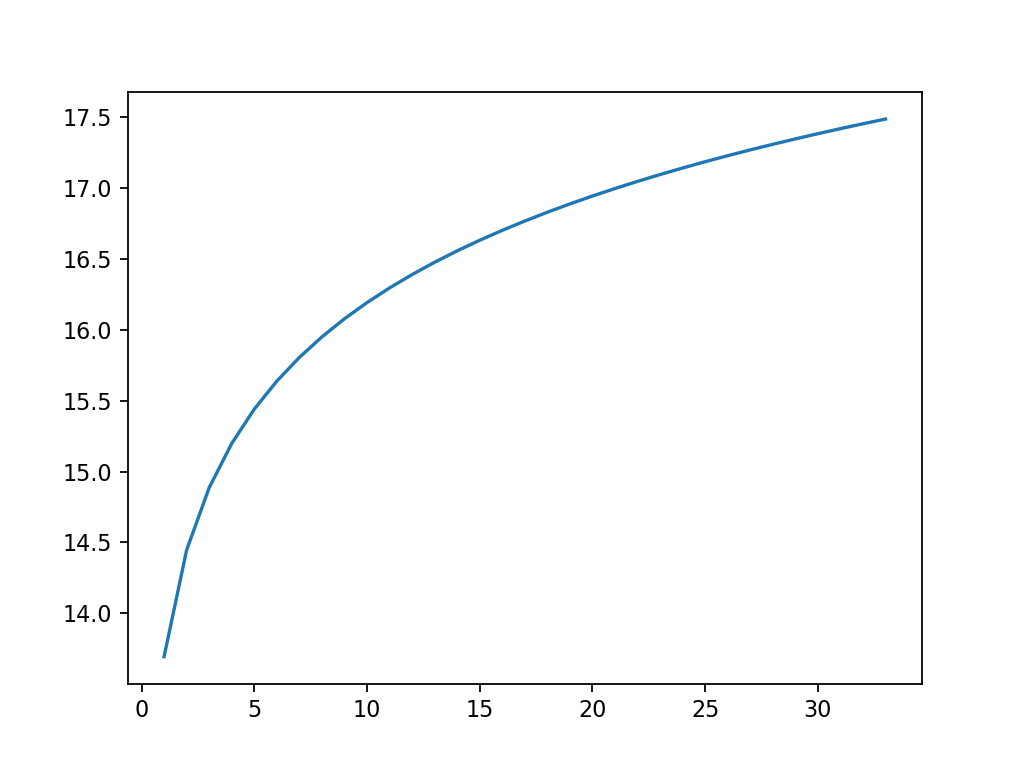

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
t = np.arange(0,1000,30)
plt.figure()
plt.plot(10+2.5*np.log10(t))
#plt.ylim(15,10)

In [16]:
life = Lifetime(21,x)

<IPython.core.display.Javascript object>


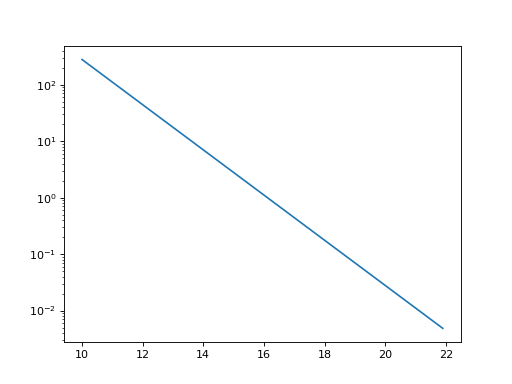

In [20]:
plt.figure()
plt.semilogy(x,life/90)

In [22]:
M_0_lim(21,90)

16.114393726401687

In [23]:
import scipy.integrate as integrate

/Users/ryanr/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/ryanr/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [26]:
integrate.quad(lambda x: Mag_dist(x),-np.inf,16)

(0.6586586263939984, 6.8969523553507e-09)

In [144]:
def GRB_prob(Lim,Time):
    """
    Calculate the probability that the GRB is observed.
    Inputs:
    -------
    Lim  - float, limiting magnitude
    Time - float, detection time in minutes
    
    Output:
    -------
    CDF - float, probability the random GRB is detectable
    """
    m0_lim = M_0_lim(Lim,Time)
    #plt.figure()
    #plt.hist(m0_lim.flatten(),bins =100)
    CDF = 1/2*(1+erf((m0_lim-mu)/(sig*np.sqrt(2))))
    return CDF

In [145]:
GRB_prob(mag,90)

array([[6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02],
       [6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02],
       [6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02

In [149]:
def GRB_rate(Limit,Duration):
    """
    Calculate the expected number of detected GRBs for a given Kepler pixel.
    
    Inputs:
    -------
    Limit    - float, Kepler magnitude limit for a pixel
    Duration - float, duration of the K2 campaign in days
    
    Output:
    -------
    numbers - float, expected number of observed GRBs
    """
    rate = 300 / 365 / 41253 # GRB / day / deg2
    pix_area = (4 / 60 / 60)**2 # deg2
    if type(Limit) != int:
        pix_area = pix_area * Limit.shape[0] * Limit.shape[1]
    Duration = Duration / 365 # yr
    lifetime = 90 # min for 3 Kepler frames
    
    prob = GRB_prob(Limit,lifetime)
    
    number = rate * pix_area * Duration * prob
    
    return number
    

In [164]:
def Total_GRB_rate(Folder,Duration):
    """
    Calculate the expected number of GRBs observed in a K2 campaign.
    
    Inputs:
    -------
    Folder   - str, directory with limit frames 
    Duration - float, duration of the K2 campaign in days
    
    Output:
    numbers - float, expected number of observed GRBs
    """
    files = glob(Folder + '*.npy')
    numbers = 0.0
    for file in files:
        arr = np.load(file)
        data = arr[0] + arr[1]
        mag = -2.5*np.log10(data) + 24.47
        num = GRB_rate(mag,Duration)
        numbers += np.nansum(num)
    return numbers


In [161]:
from tqdm import trange
path = '../../Data/Limit/c01/Limit/'

In [162]:
c01_number = Total_GRB_rate(path, 81)


  0%|          | 0/18529 [00:00<?, ?it/s]/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10

 68%|██████▊   | 12557/18529 [00:33<00:39, 152.12it/s]


100%|█████████▉| 18527/18529 [00:49<00:00, 472.39it/s]
                                                      

In [163]:
c01_number

0.00701056203704275

In [165]:
paths = glob('../../Data/Limit/c*/Limit/')

In [167]:
numbers = []
durations = [83,79,80,81,81,81,69]
for i in range(len(paths)):
    num = Total_GRB_rate(paths[i],durations[i])
    numbers += [num]

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


In [168]:
numbers

[0.007183662334253732,
 0.0019878162561089616,
 0.001869577018689066,
 0.0033741466490449343,
 0.0025627653282209676,
 0.0016587153869442785,
 0.002674380019483431]

In [169]:
np.nansum(numbers)

0.02131106299274537

In [78]:
np.isfinite(mag).shape

(22, 23)

In [97]:
[1].shape

AttributeError: 'list' object has no attribute 'shape'

In [81]:
ind[1]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
       15, 16, 17, 18, 19, 20, 21, 22,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
       14, 15, 16, 17, 18

<IPython.core.display.Javascript object>


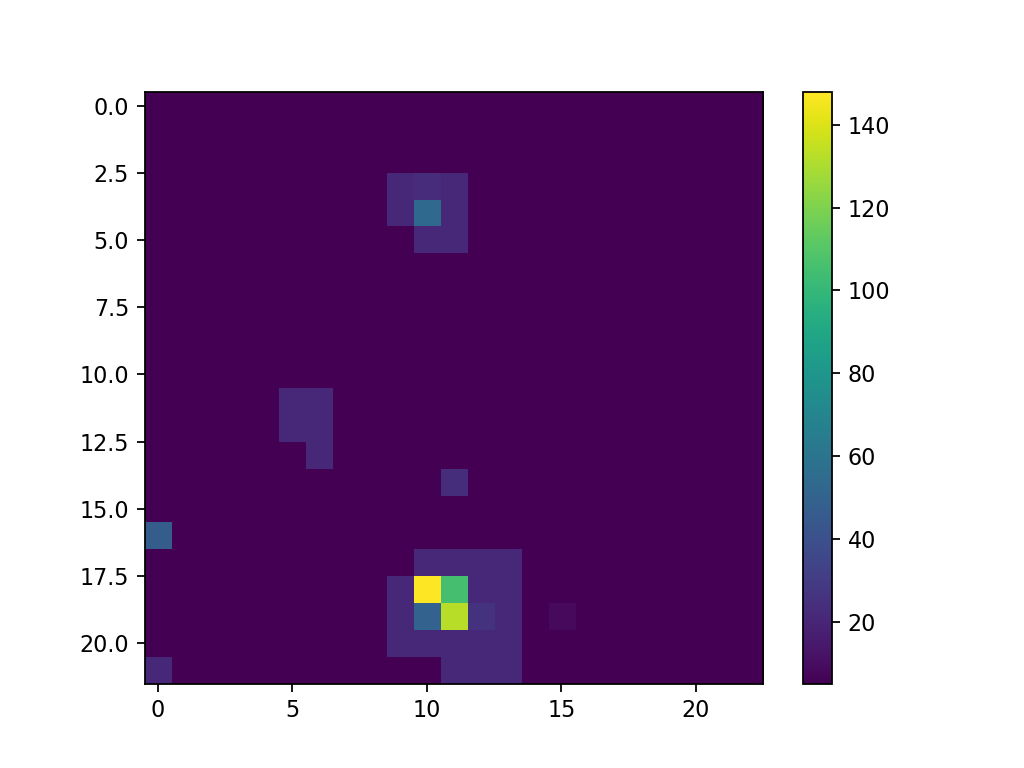

In [60]:
plt.figure()
plt.imshow(d[0]+d[1])
plt.colorbar()

In [98]:
data =d[0]+d[1] 

In [104]:
mag = M_0_lim(-2.5*np.log10(data) + 24.47,90)

In [150]:
GRB_rate(mag,80)

array([[1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10],
       [1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10],
       [1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10

In [107]:
from scipy.special import erf

In [110]:
1/2*(1-erf(x-mu/(sig*np.sqrt(2))))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1.,

In [127]:
def hack_prob(GRB_mag_lim):
    mu = 15.35
    sig = 1.59
    CDF = 1/2*(1+erf((GRB_mag_lim-mu)/(sig*np.sqrt(2))))
    return CDF

In [129]:
hack_prob(mag)

array([[0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037],
       [0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037],
       [0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.93272415, 0.94067037],
       [0.94067037, 0.94067037, 0.94067037, 0.940

In [124]:
mu = 15.35
sig = 1.59
CDF = 1/2*(1+erf(mag-mu/(sig*np.sqrt(2))))

<IPython.core.display.Javascript object>


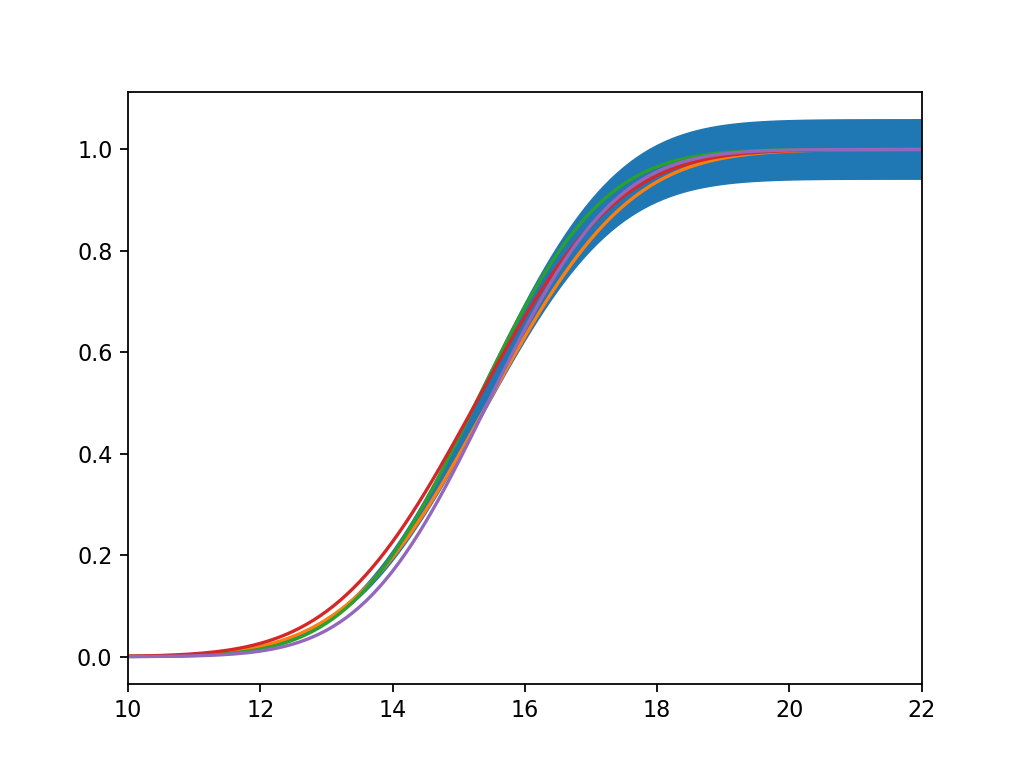

(10, 22)

In [198]:
x = np.arange(0,30,0.1)
plt.figure()
plt.plot(x,1/2*(1+erf((x-mu)/(sig*np.sqrt(2)))))
plt.plot(x,1/2*(1+erf((x-mu-0.09)/((sig+0.09)*np.sqrt(2)))))
plt.plot(x,1/2*(1+erf((x-mu+0.09)/((sig-0.09)*np.sqrt(2)))))
plt.plot(x,1/2*(1+erf((x-mu+0.09)/((sig+0.09)*np.sqrt(2)))))
plt.plot(x,1/2*(1+erf((x-mu-0.09)/((sig-0.09)*np.sqrt(2)))))
plt.fill_between(x,s-0.06*s,s+0.06*s)
plt.xlim(10,22)

<IPython.core.display.Javascript object>


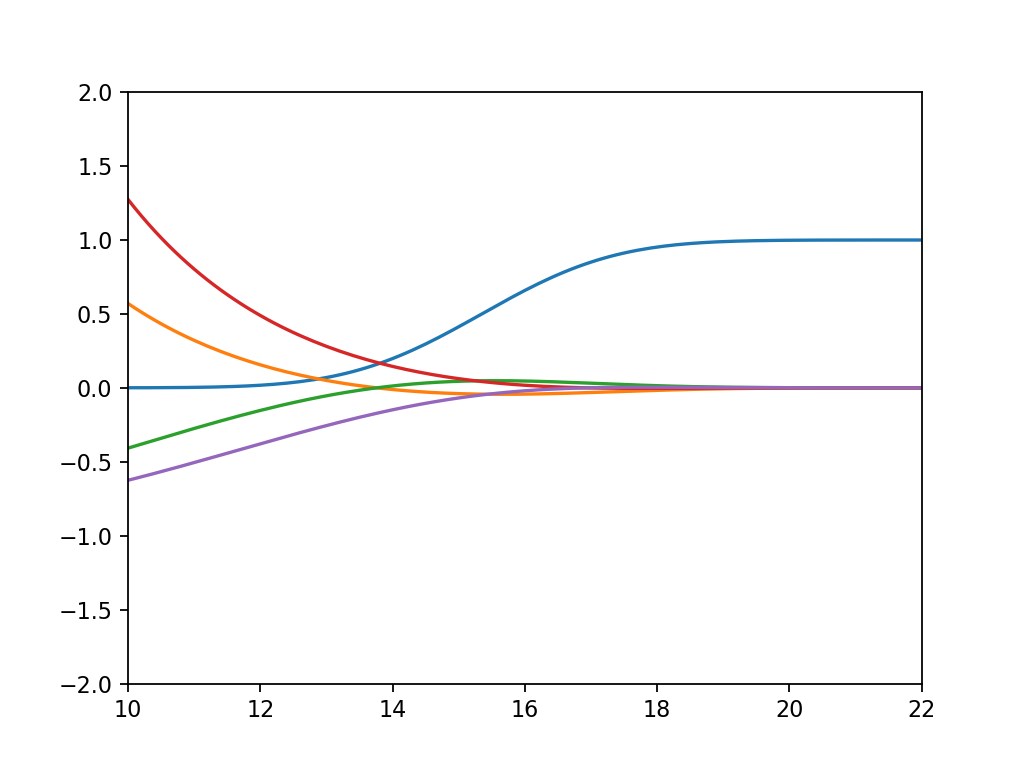

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


(-2, 2)

In [182]:
x = np.arange(0,30,0.1)
s = 1/2*(1+erf((x-mu)/(sig*np.sqrt(2))))
plt.figure()
plt.plot(x,1/2*(1+erf((x-mu)/(sig*np.sqrt(2)))))
plt.plot(x,((1/2*(1+erf((x-mu-0.09)/((sig+0.09)*np.sqrt(2)))))-s)/s)
plt.plot(x,((1/2*(1+erf((x-mu+0.09)/((sig-0.09)*np.sqrt(2)))))-s)/s)
plt.plot(x,((1/2*(1+erf((x-mu+0.09)/((sig+0.09)*np.sqrt(2)))))-s)/s)
plt.plot(x,((1/2*(1+erf((x-mu-0.09)/((sig-0.09)*np.sqrt(2)))))-s)/s)
plt.xlim(10,22)
plt.ylim(-2,2)

In [199]:
300/41253

0.007272198385571959

# Off axis 

In [304]:
def time_break(z):
    '''
    Calculate the power law break point time in days form explosion. 
    Eq. 2 from Zou 2007
    
    Input:
    ------
    z - float, redshift of GRB
    
    Output:
    -------
    t - float, time of the power law break
    '''
    t = 0.82*(1+z) * Ej**(1/3) * n0**(-1/3) * thetaj**2
    return t

def Flux_break(Z):
    '''
    Calculate the flux value at the point where the powerlaw changes. 
    Eq. 3 from Zou 2007.
    
    Input:
    ------
    Z - float, redshift of GRB
    
    Output:
    -------
    flux.value - float, break point flux in erg/s/cm2/Hz
    '''
    t = time_break(Z)
    D = Distance(z=Z).to(u.cm).value / 1e28 # luminosity distance in  10**28 cm
    flux = (515 * t**(-p) * 50.2**(2.2-p) * kf * km**((p-1)/2) * epsilon_e**(p-1) * 
            epsilon_b**((p+1)/4) * zeta**(p-1) * n0**((3-p)/12) * Ej**((p+3)/3) * D**(-2)
           * (1+Z)**((p+3)/2) * (nu/nur)**(-(p-1)/2)) * 1e-6 *u.Jy  # Jy
    flux = flux.to(u.erg / u.s/ u.cm**2 / u.Hz)
    print(flux.unit)
    return flux.value

def Time_evolution(Z,Theta):
    '''
    Calculate the light curve of a GRB afterglow. This is done by scaling the 
    flux at the break point of the lightcurve, by t**-alpha, where t is in days 
    and alpha is the power law. 
    
    I believe this is correct, however, it is never explicitely stated in the 
    Zou 2007 and Japelj 2011 papers. The closest those papers get are to state 
    F prop t**-alpha. 
    
    Inputs:
    -------
    Z - float, redshift of the GRB
    Theta - float, angle from on-axis, in degrees 
    
    Output:
    -------
    flux - 1D array, GRB lightcurve
    '''
    # calculate break time and flux
    t_b = time_break(Z)
    f_b = Flux_break(Z)
    # establish the timescale, time in days from explosion
    t = np.geomspace(0.01,100,num=1000) # time in days 
    # define flux array
    flux = np.zeros_like(t)
    # identify all time points below the break time
    ind = t < t_b
    # scale the break flux. Before the break alpha = 1,
    # see Japelj 2011.
    flux[ind] =  f_b * t[ind]**(-1)
    # After the break alpha = 7/4 (faster decline),
    # see Japelj 2011.
    flux[~ind] = f_b * t[~ind]**(-(1+3/4))
    # If it is an off-axis observation a scalling parameter applies.
    # From Zou2007: F(theta,t) = a**3 * F(0,a*t)
    # We take this to be F(theta,t) = a**4 * F(0,t), as F(t) = F_B * t**-alpha
    if Theta > 0:
        # calculate the off-axis factor
        a = a_factor(t, Z, Theta)
        # scale the flux
        flux = flux * a**4
        
    return flux
    
    

def Gamma(t, theta, z):
    t_break = time_break(z)
    if t < t_break:
        gam = theta**(-1) * (t/t_break)**(-3/8)
    elif t > t_break:
        gam = theta**(-1) * (t/t_break)**(-1/2)
    return gam

def gamma(t,z):
    '''
    Calculate the Lorentz factor of the GRB, using Eq 1 from Zou 2007.
    Inputs:
    -------
    t - 1D array, time in days since explosion
    z - float, redshift of the GRB
    
    Output:
    -------
    gam - float, Lorentz factor
    '''
    gam = 8.9 * (1 + z)**(3/8) * Ej**(1/8) * n0**(-1/8) * thetaj**(-1/4) * t**(-3/8)
    return gam

def a_factor(t,z,theta):
    '''
    Factor to relate on axis flux to off-axis flux.
    Inputs:
    -------
    t - 1D array, time since explosion in days
    z - float, redshift of event
    theta - float, viewing angle of the event, degrees
    
    Output:
    -------
    a - float, off-axis correction factor
    '''
    # convert theta to radians
    theta = theta * np.pi / 180 
    # calculate the Lorentz factor, Eq 1 from Zou 2007
    gam = gamma(t,z)
    # calculate beta factor, form Zou 2007 above Eq 5
    beta = np.sqrt(1 - (1/gam**2))
    # calculate correction factor, from Zou 2007 above Eq 5
    a = (1 - beta)/(1 - beta * np.cos(theta))
    return a

# power law index of shock-accelerated electrons 
p = 2.2 # value from Japelj 2011
# function defined in Zou 2007
zeta = 6*(p-2)/(p-1)
# function defined in Zou 2007
km = 0.73*(p-0.67)
# function defined in Zou 2007
kf = 0.09*(p+0.14)
# function defined in Zou 2007
kc = (p-0.46)*np.exp(3.16-1.16*p)
# explosion energy in units of 10**51 erg
Ej = 1 #10**51
# Density of the circumburst medium
n0 = 1 # not sure of the value
# Jet half open angle in radians 
# in units of 10**-1 from Zou 2011
thetaj = 1 # 10**-1
# energy equipartition factor of electron
# value from Japelj 2011
epsilon_e = 1 # 10**-1
# energy equipartition factor of magnetic field
# value from Japelj 2011
epsilon_b = 10 # 10**-3
# Frequency that the model is normalised to
# from Zou 2007
nur = 4.55e14 # Hz
# Frequency that the model is evaluated at
nu = 4.55e14#5.19e14 # Hz


In [301]:
def A(Time,theta_obs,theta,t_break):
    ind = Time <= t_break
    gamma = np.zeros_like(Time)
    gamma[ind] = theta**(-1) * (Time[ind]/t_break)**(-3/8)
    gamma[~ind] = theta**(-1) * (Time[~ind]/t_break)**(-1/2)
        
    beta = np.sqrt(1-1/gamma**2)
    return (1-beta)/(1-beta*np.cos(theta_obs))



In [302]:
n0 = 5


tl = np.geomspace(0.01,500,num=1000) # time in days from explosion

<IPython.core.display.Javascript object>


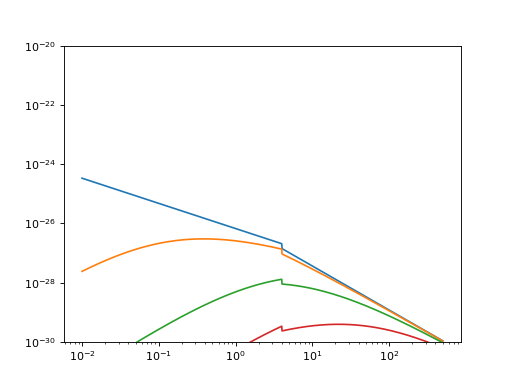

erg / (cm2 Hz s)
erg / (cm2 Hz s)
erg / (cm2 Hz s)
erg / (cm2 Hz s)


(1e-30, 1e-20)

In [305]:
angles = np.array([0,2,6,12])
plt.figure()
for angle in angles:
    f = Time_evolution(1,angle)
    plt.loglog(tl,f)
plt.ylim(10**-30,10**-20)

<IPython.core.display.Javascript object>


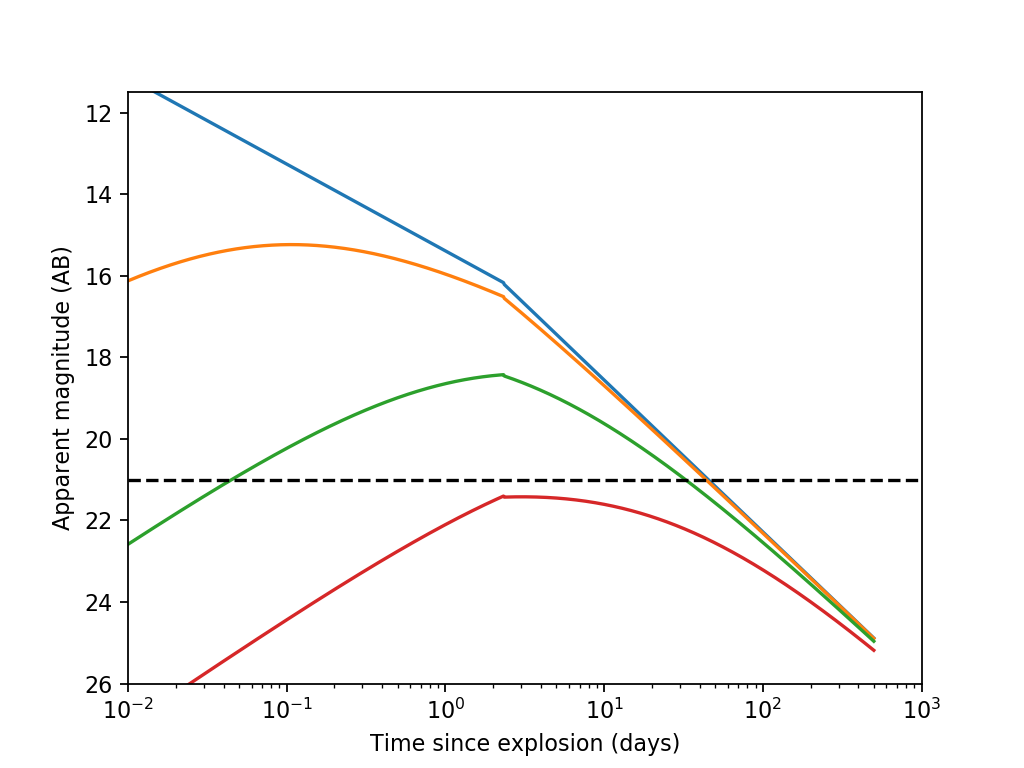

Text(0.5, 0, 'Time since explosion (days)')

In [251]:
angles = np.array([0,2,6,12])
plt.figure()
for angle in angles:
    f = Time_evolution(1,angle)
    mag = -2.5*np.log10(f) - 48.6
    plt.semilogx(tl,mag)
plt.ylim(26,11.5)
plt.xlim(0.01,1000)
plt.axhline(21,color='k',ls='--')
plt.ylabel('Apparent magnitude (AB)')
plt.xlabel('Time since explosion (days)')

<IPython.core.display.Javascript object>


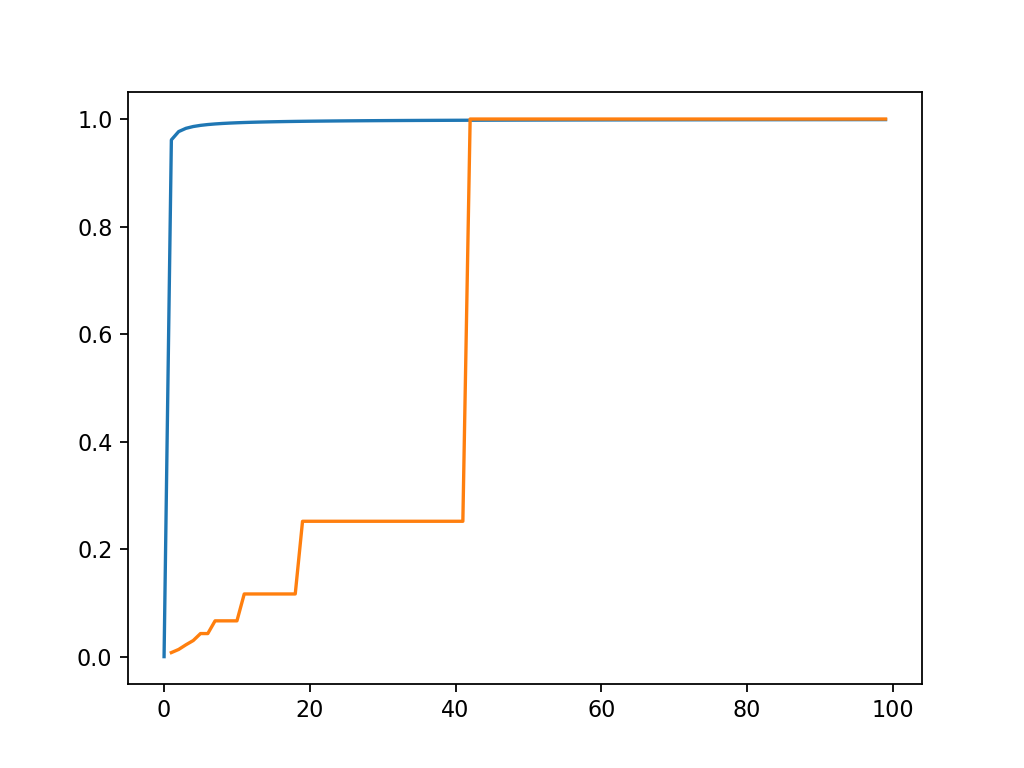

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in power
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


In [296]:
test = np.arange(0,100)
plt.figure()
plt.plot(test,a_factor(test,1,1))
plt.plot(test,A(test,1,.1,time_break(1)))

In [278]:
b=  1e-6 *u.Jy

In [279]:
b.to(u.erg / u.s/ u.cm**2 / u.Hz)

<Quantity 1.e-29 erg / (cm2 Hz s)>

In [275]:
u.cm**2

Unit("cm2")